Epoch 1/10
3/3 [==============================] - 11s 3s/step - loss: 1.2922 - accuracy: 0.4769
Epoch 2/10
3/3 [==============================] - 9s 2s/step - loss: 4.1458 - accuracy: 0.4769
Epoch 3/10
3/3 [==============================] - 9s 2s/step - loss: 0.5460 - accuracy: 0.6308
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.5290 - accuracy: 0.9077
Epoch 5/10
3/3 [==============================] - 9s 2s/step - loss: 0.4035 - accuracy: 0.9231
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.2364 - accuracy: 0.9538
Epoch 7/10
3/3 [==============================] - 9s 3s/step - loss: 0.1808 - accuracy: 0.8923
Epoch 8/10
3/3 [==============================] - 6s 2s/step - loss: 0.1110 - accuracy: 0.9538
Epoch 9/10
3/3 [==============================] - 9s 3s/step - loss: 0.1629 - accuracy: 0.9077
Epoch 10/10
1/1 [==============================] - 0s 101ms/step


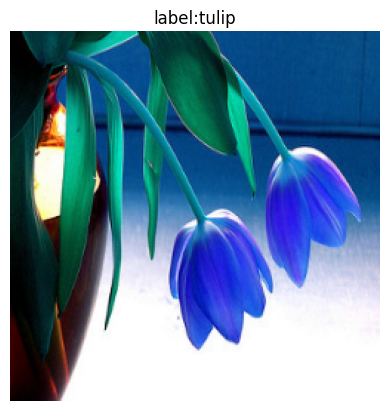

1/1 [==============================] - 0s 48ms/step


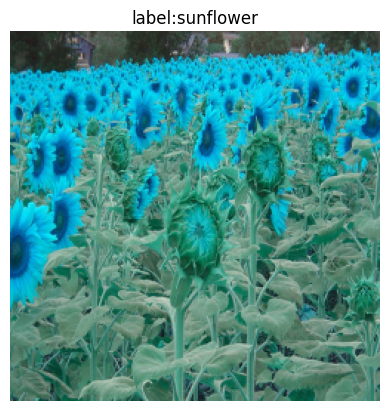

1/1 [==============================] - 0s 51ms/step


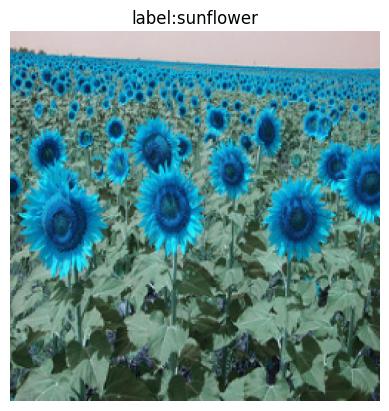

1/1 [==============================] - 0s 54ms/step


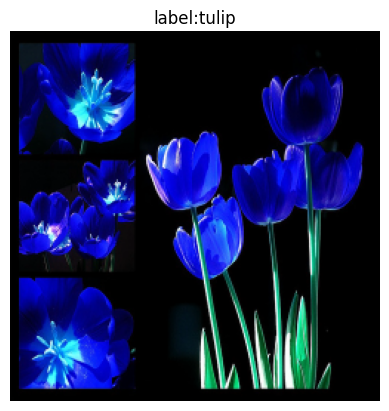

1/1 [==============================] - 0s 46ms/step


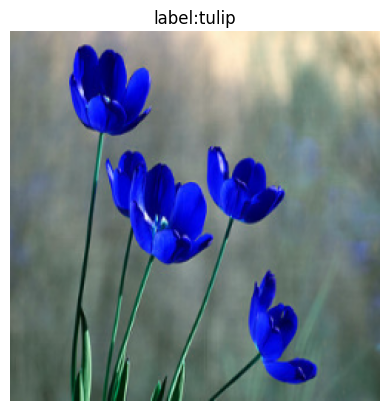

1/1 [==============================] - 0s 54ms/step


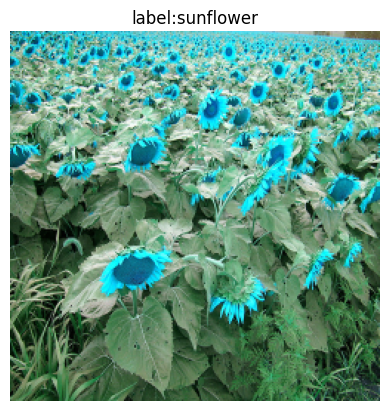

1/1 [==============================] - 0s 59ms/step


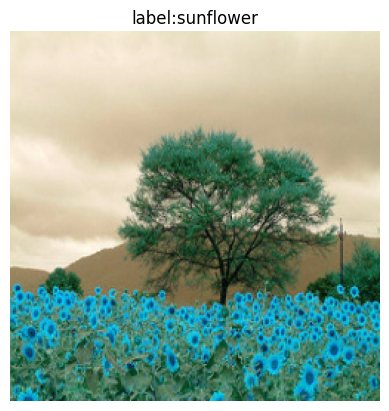

1/1 [==============================] - 0s 54ms/step


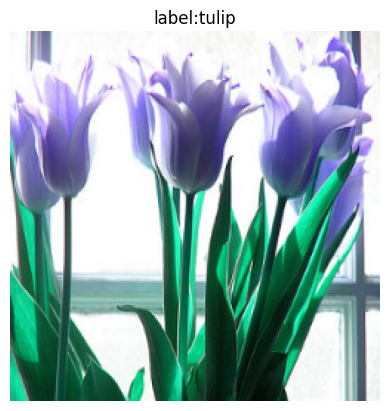

1/1 [==============================] - 0s 79ms/step


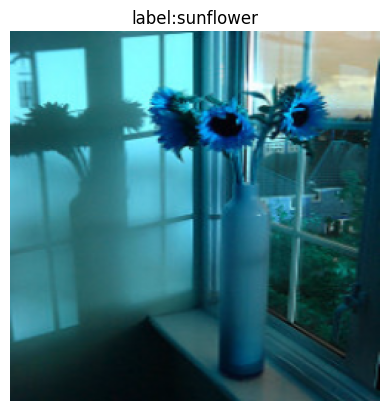

1/1 [==============================] - 0s 75ms/step


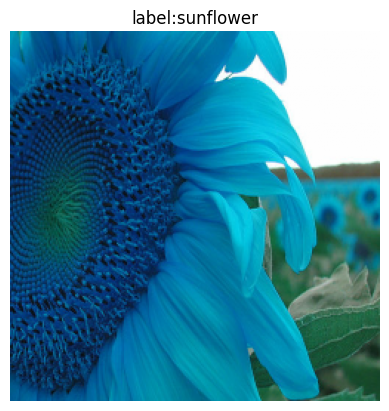

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


def load_images(*folders):
    loaded_images = []
    loaded_labels = []
    n=len(folders)
    for i in range(n):
        folder = folders[i]
        for image in os.listdir(folder):
          images = [cv2.resize(cv2.imread(os.path.join(folder, image)), (250, 250))]
          labels = [i] * len(images)
          loaded_images.extend(images)
          loaded_labels.extend(labels)
    return np.array(loaded_images), np.array(loaded_labels)

images, labels = load_images(r"/content/drive/MyDrive/flowersnew/sunflower", r"/content/drive/MyDrive/flowersnew/tulip")

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32)

model.evaluate(X_test, y_test)

def predict(index, threshold=0.5):
    predicted_prob = model.predict(X_test[[index]])
    predicted_label = "sunflower" if predicted_prob[0][0] <threshold else "tulip"
    plt.figure()
    plt.imshow(X_test[index])
    plt.title('label:' + predicted_label)
    plt.axis("off")
    plt.show()


len(X_test)
predict(10)
predict(2)
predict(1)
predict(12)
predict(14)
predict(5)
predict(3)
predict(7)
predict(9)
predict(11)
